In [1]:
import seaborn
import pandas as pd
import numpy as np
import requests as req
import json
import matplotlib.pyplot as plt
import csv
import os
import time
import datetime
import scipy as stats
import arrow
from citipy import citipy

In [2]:
# Lists for holding Us Geological Survey (USGS) json data
mag_data = []
place_data = []
time_data = []
updated_data = []
tz_data = []
url_data = []
detail_data = []
felt_data = []
cdi_data = []
mmi_data = []
alert_data = []
status_data = []
tsunami_data = []
sig_data = []
net_data = []
code_data = []
ids_data = []
sources_data = []
types_data = []
nst_data = []
dmin_data = []
rms_data = []
gap_data = []
magType_data = []
type_data = []
title_data = []
geo_type_data = []
lng_data = []
lat_data = []
coordinates_3_data = []

#calculated lists
converted_date = []
cd_by_month = []
cd_by_year = []

epoch_by_month = []

In [3]:
#https://earthquake.usgs.gov/fdsnws/event/1/query.geojson?starttime=2017-07-14%2000:00:00&endtime=2017-09-21%2023:59:59&maxlatitude=50&minlatitude=24.6&maxlongitude=-65&minlongitude=-125&minmagnitude=2.5&orderby=time

years = 5
start = 1900
end = 2020
start_loop = start

json_returns = ((end-start)/years)+1



for x in range(int(json_returns)):

    url_bit_1 = "https://earthquake.usgs.gov/fdsnws/event/1/query.geojson?starttime="
    year_from_1 = str(start_loop)
    year_from_2= "-01-01"
    year_to = str(int(year_from_1) + years)
    url_bit_2= "-01-01%0000:00:00&maxlatitude=50&minlatitude=24.6&maxlongitude=-65&minlongitude=-125&minmagnitude=2.5&orderby=time"

    # Build partial query URL
    Search = url_bit_1 + year_from_1 + year_from_2  + "%0000:00:01&endtime=" + year_to + url_bit_2
    #Search

    # set response variable
    response = req.get(Search).json()

    # idetify how many seismic events are in our json
    usgs_json_data = json.dumps(response)

    item_dict = json.loads(usgs_json_data)

    json_loops = len(item_dict['features'])

    #append usgs_json_data into list form

    json_counter = 0

    for x in range(json_loops):

        mag_data.append(response["features"][json_counter]["properties"]["mag"])
        place_data.append(response["features"][json_counter]["properties"]["place"])
        time_data.append(response["features"][json_counter]["properties"]["time"])
        updated_data.append(response["features"][json_counter]["properties"]["updated"])
        tz_data.append(response["features"][json_counter]["properties"]["tz"])
        url_data.append(response["features"][json_counter]["properties"]["url"])
        detail_data.append(response["features"][json_counter]["properties"]["detail"])
        felt_data.append(response["features"][json_counter]["properties"]["felt"])
        cdi_data.append(response["features"][json_counter]["properties"]["cdi"])
        mmi_data.append(response["features"][json_counter]["properties"]["mmi"])
        alert_data.append(response["features"][json_counter]["properties"]["alert"])
        status_data.append(response["features"][json_counter]["properties"]["status"])
        tsunami_data.append(response["features"][json_counter]["properties"]["tsunami"])
        sig_data.append(response["features"][json_counter]["properties"]["sig"])
        net_data.append(response["features"][json_counter]["properties"]["net"])
        code_data.append(response["features"][json_counter]["properties"]["code"])
        ids_data.append(response["features"][json_counter]["properties"]["ids"])
        sources_data.append(response["features"][json_counter]["properties"]["sources"])
        types_data.append(response["features"][json_counter]["properties"]["types"])
        nst_data.append(response["features"][json_counter]["properties"]["nst"])
        dmin_data.append(response["features"][json_counter]["properties"]["dmin"])
        rms_data.append(response["features"][json_counter]["properties"]["rms"])
        gap_data.append(response["features"][json_counter]["properties"]["gap"])
        magType_data.append(response["features"][json_counter]["properties"]["magType"])
        type_data.append(response["features"][json_counter]["properties"]["type"])
        title_data.append(response["features"][json_counter]["properties"]["title"])
        geo_type_data.append(response["features"][json_counter]["geometry"]["type"])
        lng_data.append(response["features"][json_counter]["geometry"]["coordinates"][0])
        lat_data.append(response["features"][json_counter]["geometry"]["coordinates"][1])
        coordinates_3_data.append(response["features"][json_counter]["geometry"]["coordinates"][2])

        
        
        # calculated fields
        
        converted_date.append((datetime.datetime(1970, 1, 1) + datetime.timedelta(milliseconds=time_data[len(converted_date)-1])).strftime('%m-%d-%Y'))
        cd_by_month.append((datetime.datetime(1970, 1, 1) + datetime.timedelta(milliseconds=time_data[len(cd_by_month)-1])).strftime('%m-%Y'))
        cd_by_year.append((datetime.datetime(1970, 1, 1) + datetime.timedelta(milliseconds=time_data[len(cd_by_year)-1])).strftime('%Y'))

        epoch_by_month.append(arrow.get(cd_by_month[len(cd_by_month)-1], 'MM-YYYY').format('X'))
        
               
        json_counter = json_counter + 1    
        
    start_loop = year_to     

In [4]:
seismic_data = {"mag" : mag_data,
                "place" : place_data,
                "time" : time_data,
                "updated" : updated_data,
                "tz" : tz_data,
                "url" : url_data,
                "detail" : detail_data,
                "felt" : felt_data,
                "cdi" : cdi_data,
                "mmi" : mmi_data,
                "alert" : alert_data,
                "status" : status_data,
                "tsunami" : tsunami_data,
                "sig" : sig_data,
                "net" : net_data,
                "code" : code_data,
                "ids" : ids_data,
                "sources" : sources_data,
                "types" : types_data,
                "nst" : nst_data,
                "dmin" : dmin_data,
                "rms" : rms_data,
                "gap" : gap_data,
                "magType" : magType_data,
                "type" : type_data,
                "title" : title_data,
                "geo_type" : geo_type_data,
                "lng" : lng_data,
                "lat" : lat_data,
                "coordinates_3" : coordinates_3_data,

                "converted_date" : converted_date,
                "cd_by_month" : cd_by_month,
                "cd_by_year" : cd_by_year,
                
                "epoch_by_month" : epoch_by_month,
                
               }

seismic_data = pd.DataFrame(seismic_data)

#first and last event
year_range = seismic_data.iloc[0,2] + " through " + seismic_data.iloc[len(seismic_data)-1,2]


In [5]:
seismic_data.to_csv("seismic_data.csv")

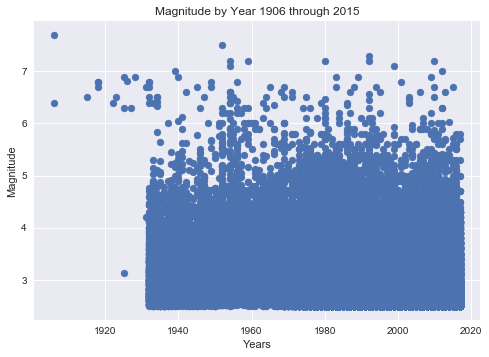

In [6]:
# Build a scatter plot for each data type
plt.scatter(seismic_data["cd_by_year"], seismic_data["mag"], marker="o")

# Incorporate the other graph properties
plt.title("Magnitude by Year" + " " + year_range)
plt.ylabel("Magnitude")
plt.xlabel("Years")
plt.grid(True)

# Save the figure
#plt.savefig("Magnitude by Month.png")

# Show plot
plt.show()

In [7]:
seismic_avg_year = seismic_data.groupby(["cd_by_year"]).mean()["mag"]
seismic_count_year = seismic_data.groupby(["cd_by_year"]).count()["mag"]


# time.mktime(datetime.datetime.strptime(s, "%d/%m/%Y").timetuple())

# unix_month_year = seismic_data.["cd_by_year"]
# unix_year

seismic_data2_df = pd.DataFrame({"seismic_avg_year" : seismic_avg_year,
                                "seismic_count_year" : seismic_count_year,
                                })

seismic_data2_df = seismic_data2_df.reset_index()

seismic_data2_df.head()


,cd_by_year,seismic_avg_year,seismic_count_year
0,1906,7.050000,2
1,1915,6.500000,1
2,1918,6.766667,3
3,1922,6.400000,1
4,1923,6.500000,1


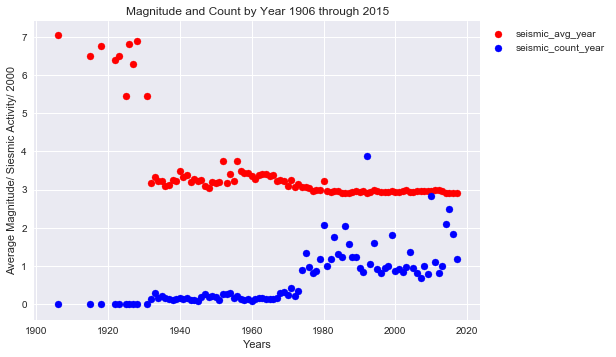

In [8]:
# Build a scatter plot for each data type
plt.scatter(seismic_data2_df["cd_by_year"], seismic_data2_df["seismic_avg_year"], marker="o", c=["red"])
plt.scatter(seismic_data2_df["cd_by_year"], seismic_data2_df["seismic_count_year"]/2000, marker="o", c=["blue"])

# Incorporate the other graph properties
plt.title("Magnitude and Count by Year" + " " + year_range)
plt.ylabel("Average Magnitude/ Siesmic Activity/ 2000")
plt.xlabel("Years")
plt.grid(True)

# Save the figure
#plt.savefig("Magnitude and Count by Year.png")

plt.legend(bbox_to_anchor=(1.3, 1))

# Show plot
plt.show()

In [9]:
seismic_avg_year = seismic_data.groupby(["cd_by_month"]).mean()["mag"]
seismic_count_year = seismic_data.groupby(["cd_by_month"]).count()["mag"]

seismic_data2_df = pd.DataFrame({"seismic_avg_year" : seismic_avg_year,
                                "seismic_count_year" : seismic_count_year,
                                })

seismic_data2_df = seismic_data2_df.reset_index()

seismic_data2_df.head()

,cd_by_month,seismic_avg_year,seismic_count_year
0,01-1931,4.200000,1
1,01-1932,3.315909,22
2,01-1933,3.409600,25
3,01-1934,3.124815,27
4,01-1935,3.304103,39


In [10]:
# import matplotlib.dates as mdates

# a = pd.DatetimeIndex(start='2010-01-01',end='2014-01-01' , freq='D')
# b = pd.Series(np.random.randn(len(a)), index=a)
# fig, ax = plt.subplots()
# ax.plot(b.index, b)
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))




# Build a scatter plot for each data type
plt.scatter(seismic_data2_df["cd_by_month"], seismic_data2_df["seismic_avg_year"], marker="o", c=["red"])
plt.scatter(seismic_data2_df["cd_by_month"], seismic_data2_df["seismic_count_year"]/2000, marker="o", c=["blue"])

# Incorporate the other graph properties
plt.title("Magnitude and Count by Month" + " " + year_range)
plt.ylabel("Average Magnitude/ Siesmic Activity/ 2000")
plt.xlabel("Years")
plt.grid(True)

# Save the figure
#plt.savefig("Magnitude and Count by Month.png")

plt.legend(bbox_to_anchor=(1.3, 1))

# Show plot
plt.show()

ValueError: could not convert string to float: '12-2016'

In [ ]:
# time.mktime(datetime.datetime.strptime(s, "%d/%m/%Y").timetuple())

unix_month_year = time.mktime(datetime.datetime.strptime(09 2017, "%m %Y").timetuple())
# unix_year



unix_month_year
#seismic_data.cd_by_year

In [ ]:
cd_by_month

In [ ]:
Search

In [ ]:
cd_by_month